In [60]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
def dydx(x,y):
    return np.cos(x)
def exact(x,y):
    return np.sin(x)

def forward_euler(y0, x0 = 0, N = 100,h = 0.1):
    x = np.linspace(x0, (N-1)*h, N)
    x = [i for i in x]
    y = [y0]
    for i in range(1 , N):
        f = dydx(x[i-1],y[i-1])
        y.append(h*(f) + y[i - 1])
    return x,y


In [3]:
y0 = 0
x,y = forward_euler(y0 = y0, x0 = 0, N = 100,h = 0.1)

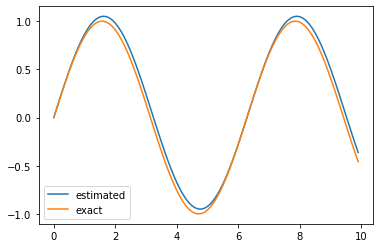

In [4]:
plt.plot(x,y)
yexact = [y0]
for i in range(1,len(x)):
    yexact.append(exact(x[i],y[i-1]))
    
plt.plot(x,yexact)
plt.legend(['estimated', 'exact'])

In [5]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,x)
def dfdy():
    return lamda

def forward_euler(y0, x0 = 0, N = 100,h = 0.1):
    x = np.linspace(x0, (N-1)*h, N)
    x = [i for i in x]
    y = [y0]
    for i in range(1 , N):
        f = dydx(x[i-1],y[i-1])
        y.append(h*(f) + y[i - 1])
    return x,y


def newton(xkp1,y0,Y,h, iters = 100, tol = 1e-4, multiple_var = False):
    if multiple_var:
        n = y0.shape[0]
    else:
        n = 1
    yk = y0
    k = 0
    for i in range(iters):
        k = k + 1
        Yold = Y.copy()
        f = yk + h*dydx(xkp1,Y)
        fp = yk + h*dfdy() - np.eye(n)
        fpinv = np.linalg.inv(fp)
        
        increment = np.dot(fpinv,f)
        Y = Y - increment
        if np.linalg.norm(np.abs(Yold - Y)) < tol:
            return Y,k
    return Y,k
    
def backward_euler(y0, lamda, x0 = 0, N = 100,h = 0.1, multiple_var = False):
    
    x = np.linspace(x0, (N-1)*h, N)
    x = [i for i in x]
    y = [y0]
    iteations = []
    for i in range(1 , N):
        x_init, y_init = forward_euler(y0 = y[-1], x0 = x[i-1], N = 8, h = h)
        y_init = np.array(y_init)
        Y = y_init[-1] + h*dydx(x[i-1],y_init[-1])
        Y,k = newton(x[i],y_init[-1],Y,h, iters = 100, tol = 1e-4, multiple_var = multiple_var)
        y.append(Y)
        iteations.append(k)
    return x,y,iteations






# Q 2




**forward Euler, lambda = -23, y0 = 1**

**a**

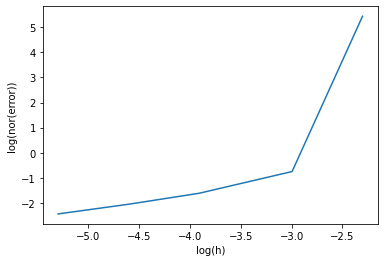

In [6]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
for h in hs:
    x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()
    

**b**

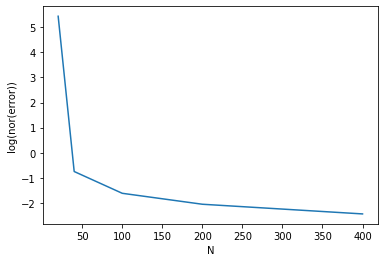

In [7]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
iteations = []
for h in hs:
    x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/h),h = h)
    iteations.append(int(2/h))
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()
    

**c**

d:\Users\parsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


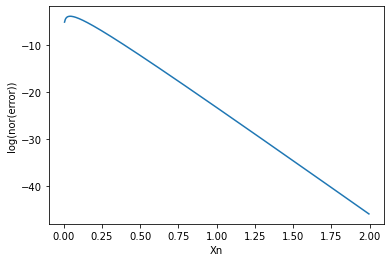

In [7]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y)
plt.plot(x,np.log(np.abs(ye - y)))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()
    

**forward Euler, lambda = 1, y0 = 1**

**a**

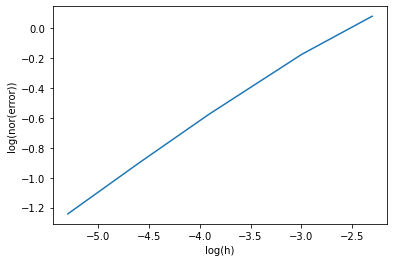

In [8]:
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1.0
y0 = 1.0
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
for h in hs:
    x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()

**b**

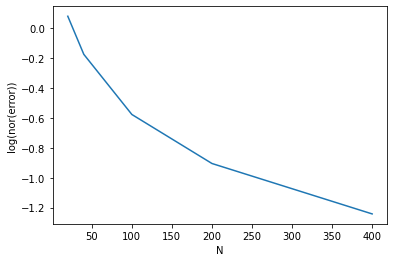

In [9]:
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1.0
y0 = 1.0
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
iteations = []
for h in hs:
    x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/h),h = h)
    iteations.append(int(2/h))
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()

**c**

d:\Users\parsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


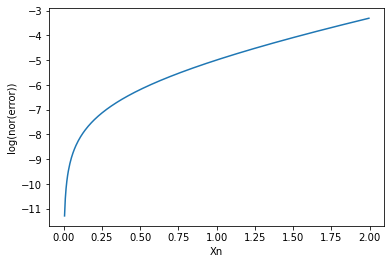

In [11]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
norm_err = []
x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y)
plt.plot(x,np.log(np.abs(ye - y)))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()
    

**forward Euler, lambda = [[-1, 0],**

............--------.............**[0, -100]], y0 = 1**

**a**

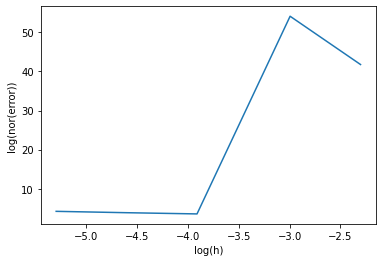

In [12]:
def exact(x,y, lamda):
    return np.exp(np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
norm_err = []
for h in hs:
    x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y,lamda = 1)
    y1 = [i[0] for i in y]
    norm_err1.append(np.linalg.norm(np.abs(ye - y1)))   
    ye = exact(x,y,lamda = -100)
    y1 = [i[1] for i in y]
    norm_err2.append(np.linalg.norm(np.abs(ye - y1)))
    norm_err.append(np.linalg.norm([norm_err1[-1], norm_err2[-1]]))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()

**b**

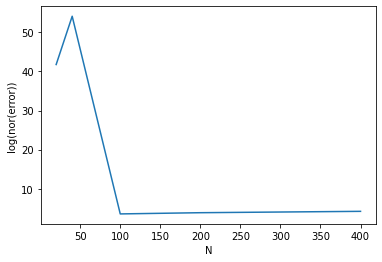

In [13]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
iteations = []
norm_err = []
for h in hs:
    x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y,lamda = 1)
    y1 = [i[0] for i in y]
    norm_err1.append(np.linalg.norm(np.abs(ye - y1)))
    iteations.append(int(2/h))
    ye = exact(x,y,lamda = -100)
    y1 = [i[1] for i in y]
    norm_err2.append(np.linalg.norm(np.abs(ye - y1)))
    norm_err.append(np.linalg.norm([norm_err1[-1], norm_err2[-1]]))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()

**c**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


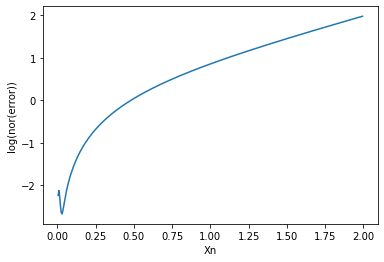

In [30]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
x,y = forward_euler(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y,lamda = 1)
y1 = [i[0] for i in y]
err1 = np.abs(ye - y1)
ye = exact(x,y,lamda = -100)
y1 = [i[1] for i in y]
err2 = np.abs(ye - y1)
norm_err = [np.linalg.norm([err2[i], err1[i]]) for i in range(len(x))]
plt.plot(x, np.log(norm_err))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()

**backward Euler, lambda = -23, y0 = 1**

**a**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


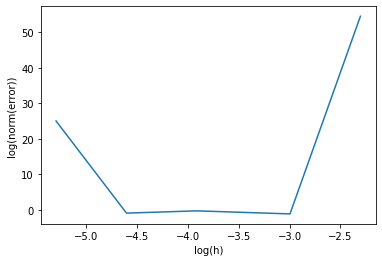

In [431]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
for h in hs:
    x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))

norm_err = [i[0][0] for i in norm_err]
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(norm(error))')
plt.show()

**b**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


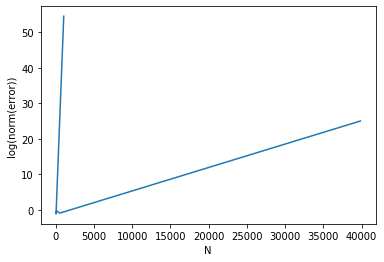

In [371]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
iterations = []
for h in hs:
    x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
    iterations.append(np.sum(k))
norm_err = [i[0][0] for i in norm_err]
plt.plot(iterations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(norm(error))')
plt.show()

**c**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


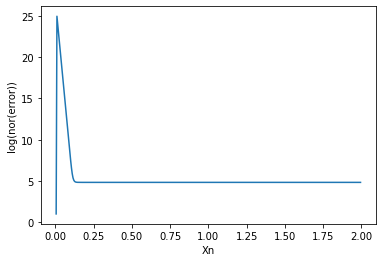

In [407]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
norm_err = []
x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/h),h = h)
ye = exact(x,y)
y1 = []
for j,i in enumerate(y):
    if j ==0:
        y1.append(i) 
    else:
        y1.append(i[0][0]) 
plt.plot(x,np.log(np.abs(ye - y1)))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()
    

**backward Euler, lambda = 1, y0 = 1**

**a**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


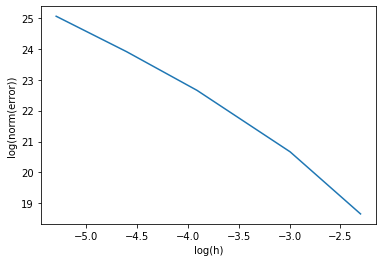

In [377]:
lamda = 1
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
for h in hs:
    x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))

norm_err = [i[0][0] for i in norm_err]
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(norm(error))')
plt.show()

**b**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


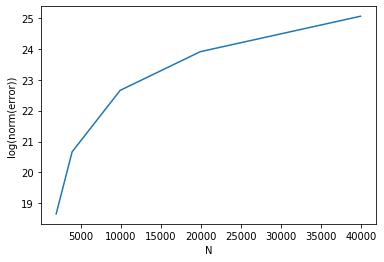

In [376]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
iterations = []
for h in hs:
    x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
    iterations.append(np.sum(k))
norm_err = [i[0][0] for i in norm_err]
plt.plot(iterations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(norm(error))')
plt.show()

**cc**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


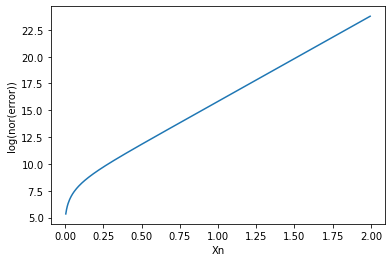

In [408]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
norm_err = []
x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/h),h = h)
ye = exact(x,y)
y1 = []
for j,i in enumerate(y):
    if j ==0:
        y1.append(i) 
    else:
        y1.append(i[0][0]) 
plt.plot(x,np.log(np.abs(ye - y1)))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()
    

**a**

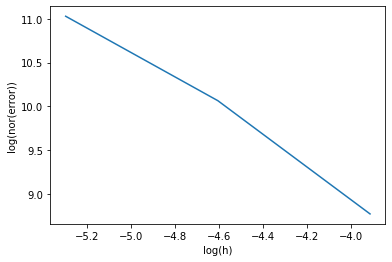

In [31]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
norm_err = []
for h in hs:
    x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y,lamda = 1)
    y1 = [i[0] for i in y]
    norm_err1.append(np.linalg.norm(np.abs(ye - y1)))
    
    ye = exact(x,y,lamda = -100)
    y1 = [i[1] for i in y]
    norm_err2.append(np.linalg.norm(np.abs(ye - y1)))
    norm_err.append(np.linalg.norm([norm_err1[-1], norm_err2[-1]]))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()

**b**

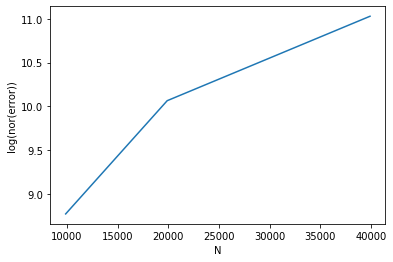

In [33]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
norm_err = []
iterations = []
for h in hs:
    x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y,lamda = 1)
    y1 = [i[0] for i in y]
    norm_err1.append(np.linalg.norm(np.abs(ye - y1)))
    iterations.append(np.sum(k))
    ye = exact(x,y,lamda = -100)
    y1 = [i[1] for i in y]
    norm_err2.append(np.linalg.norm(np.abs(ye - y1)))
    norm_err.append(np.linalg.norm([norm_err1[-1], norm_err2[-1]]))
plt.plot(iterations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()

**c**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


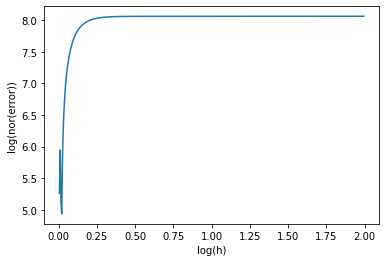

In [34]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
x,y,k = backward_euler(y0, lamda, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y,lamda = 1)
y1 = [i[0] for i in y]
err1 = np.abs(ye - y1)
ye = exact(x,y,lamda = -100)
y1 = [i[1] for i in y]
err2 = np.abs(ye - y1)
norm_err = [np.linalg.norm([err2[i], err1[i]]) for i in range(len(x))]
plt.plot(x,np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()

# Q3

In [58]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

def rungeKutta_2nd(y0, x0 = 0, N = 100,h = 0.1) :
    yk = y0;  
    x = []
    y = []
    for i in range(1, N + 1) : 
        s1 = h * dydx(x0, yk);  
        s2 = h * dydx(x0 + 0.5 * h, yk + 0.5 * s1); 
        yk = yk + (1.0 / 6.0) * (s1 + 2 * s2); 
        x.append(x0)
        y.append(yk)
        x0 = x0 + h; 
    return x,y;  

In [59]:
def rungeKutta_4th(y0, x0 = 0, N = 100,h = 0.1): 
    yk = y0 
    x = []
    y = []
    for i in range(1, N + 1): 
        s1 = h * dydx(x0, yk) 
        s2 = h * dydx(x0 + 0.5 * h, yk + 0.5 * s1) 
        s3 = h * dydx(x0 + 0.5 * h, yk + 0.5 * s2) 
        s4 = h * dydx(x0 + h, yk + s3) 
        yk = yk + (1.0 / 6.0)*(s1 + 2 * s2 + 2 * s3 + s4)
        x.append(x0)
        y.append(yk)
        x0 = x0 + h 
    return x,y 

**RK 2nd, lambda = -23, y0 = 1**

**a**

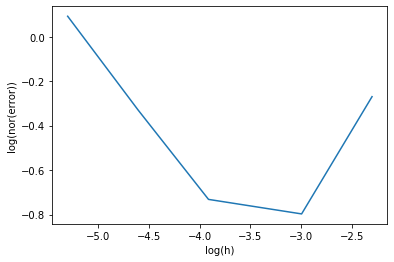

In [37]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
for h in hs:
    x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()


**b**

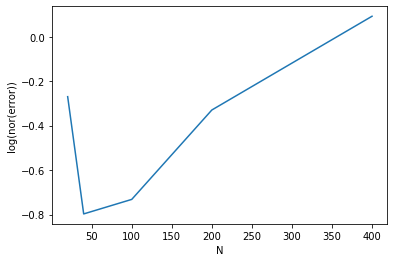

In [38]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
iteations = []
for h in hs:
    x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/h),h = h)
    iteations.append(int(2/h))
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()
    

**c**

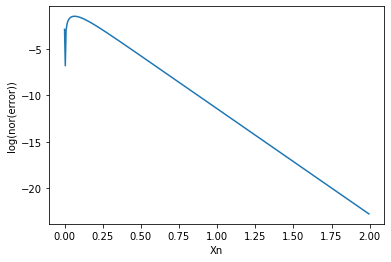

In [39]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y)
plt.plot(x,np.log(np.abs(ye - y)))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()
    

**RK 4th, lambda = -23, y0 = 1**

**a**

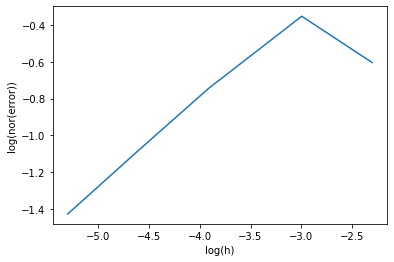

In [40]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
for h in hs:
    x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()


**b**

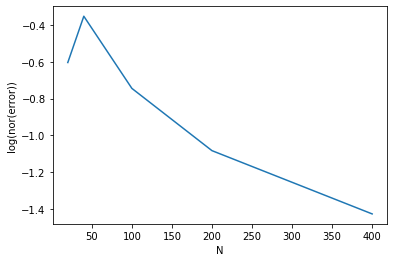

In [41]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
iteations = []
for h in hs:
    x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/h),h = h)
    iteations.append(int(2/h))
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()
    

**c**

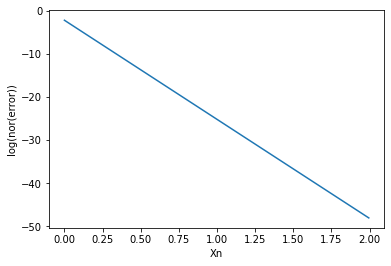

In [42]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = -23
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y)
plt.plot(x,np.log(np.abs(ye - y)))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()
    

**RK 2nd, lambda = 1 , y0 = 1**

**a**

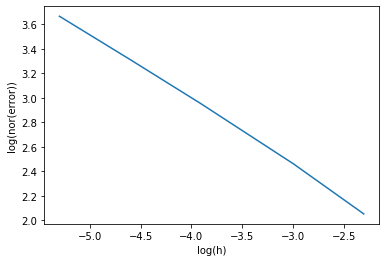

In [43]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
for h in hs:
    x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()


**b**

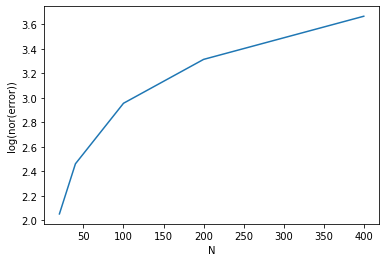

In [44]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
iteations = []
for h in hs:
    x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/h),h = h)
    iteations.append(int(2/h))
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()
    

**c**

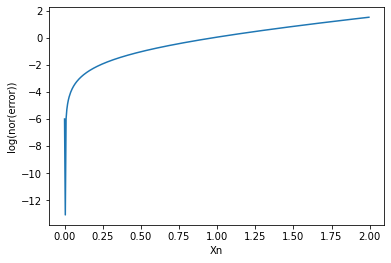

In [48]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y)
plt.plot(x,np.log(np.abs(ye - y)))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()
    

**RK 4th, lambda = 1 , y0 = 1**

**a**

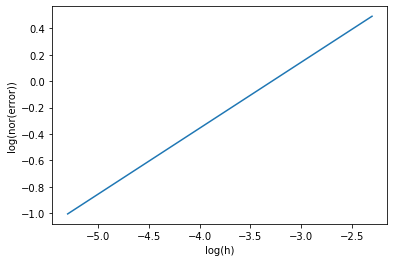

In [46]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
for h in hs:
    x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()


**b**

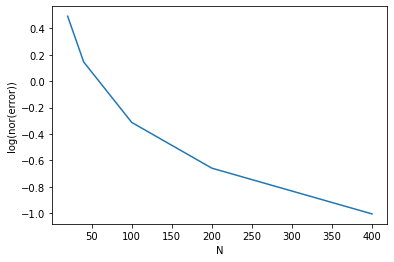

In [47]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
iteations = []
for h in hs:
    x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/h),h = h)
    iteations.append(int(2/h))
    ye = exact(x,y)
    norm_err.append(np.linalg.norm(np.abs(ye - y)))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()
    

**c**

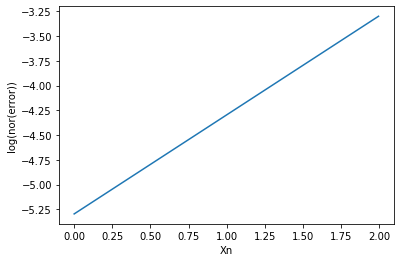

In [48]:
def dydx(x,y):
    xx= np.dot(lamda,y)
    return xx
def exact(x,y):
    return np.power(np.e,np.dot(lamda,x))

lamda = 1
y0 = 1
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err = []
x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y)
plt.plot(x,np.log(np.abs(ye - y)))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()

**RK 2nd, lambda = [[-1, 0],**

............--------.............**[0, -100]], y0 = 1**

**a**

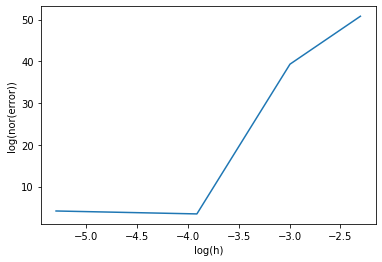

In [61]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
norm_err = []
for h in hs:
    x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y,lamda = 1)
    y1 = [i[0] for i in y]
    norm_err1.append(np.linalg.norm(np.abs(ye - y1)))
    
    ye = exact(x,y,lamda = -100)
    y1 = [i[1] for i in y]
    norm_err2.append(np.linalg.norm(np.abs(ye - y1)))
    norm_err.append(np.linalg.norm([norm_err1[-1], norm_err2[-1]]))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()

**b**

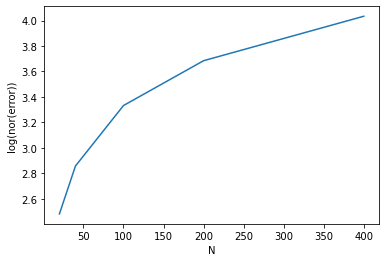

In [62]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
norm_err = []
iteations = []

for h in hs:
    x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y,lamda = 1)
    y1 = [i[0] for i in y]
    norm_err1.append(np.linalg.norm(np.abs(ye - y1)))
    iteations.append(int(2/h))
    ye = exact(x,y,lamda = -100)
    y1 = [i[1] for i in y]
    norm_err2.append(np.linalg.norm(np.abs(ye - y1)))
    norm_err.append(np.linalg.norm([norm_err1[-1], norm_err2[-1]]))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()

**c**

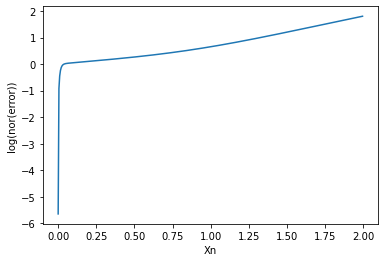

In [63]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
x,y = rungeKutta_2nd(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y,lamda = 1)
y1 = [i[0] for i in y]
err1 = np.abs(ye - y1)
ye = exact(x,y,lamda = -100)
y1 = [i[1] for i in y]
err2 = np.abs(ye - y1)
norm_err = [np.linalg.norm([err2[i], err1[i]]) for i in range(len(x))]
plt.plot(x,np.log(norm_err))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()

**RK 4th, lambda = [[-1, 0],**

............--------.............**[0, -100]], y0 = 1**

**a**

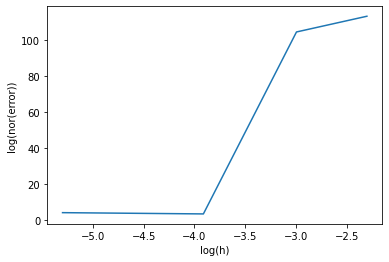

In [57]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
norm_err = []
for h in hs:
    x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y,lamda = 1)
    y1 = [i[0] for i in y]
    norm_err1.append(np.linalg.norm(np.abs(ye - y1)))
    
    ye = exact(x,y,lamda = -100)
    y1 = [i[1] for i in y]
    norm_err2.append(np.linalg.norm(np.abs(ye - y1)))
    norm_err.append(np.linalg.norm([norm_err1[-1], norm_err2[-1]]))
plt.plot(np.log(hs),np.log(norm_err))
plt.xlabel('log(h)')
plt.ylabel('log(nor(error))')
plt.show()

**b**

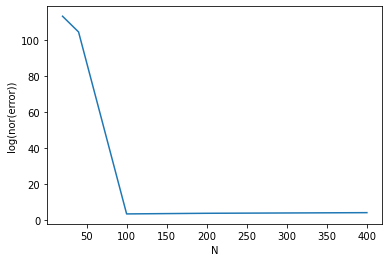

In [58]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
norm_err = []
iteations = []

for h in hs:
    x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/h),h = h)
    ye = exact(x,y,lamda = 1)
    y1 = [i[0] for i in y]
    norm_err1.append(np.linalg.norm(np.abs(ye - y1)))
    iteations.append(int(2/h))
    ye = exact(x,y,lamda = -100)
    y1 = [i[1] for i in y]
    norm_err2.append(np.linalg.norm(np.abs(ye - y1)))
    norm_err.append(np.linalg.norm([norm_err1[-1], norm_err2[-1]]))
plt.plot(iteations,np.log(norm_err))
plt.xlabel('N')
plt.ylabel('log(nor(error))')
plt.show()

**c**

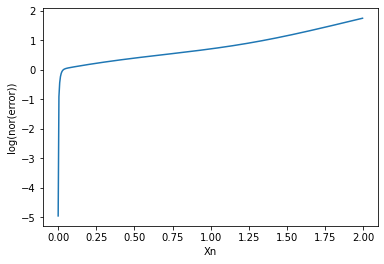

In [64]:
def exact(x,y, lamda):
    return np.power(np.e,np.dot(lamda,x))

lamda = np.array([[-1,0],[0,-100]])
y0 = np.array([1,1])
hs = [0.1, 0.05, 0.02, 0.01, 0.005]
norm_err1 = []
norm_err2 = []
x,y = rungeKutta_4th(y0 = y0, x0 = 0, N = int(2/.005),h = .005)
ye = exact(x,y,lamda = 1)
y1 = [i[0] for i in y]
err1 = np.abs(ye - y1)
ye = exact(x,y,lamda = -100)
y1 = [i[1] for i in y]
err2 = np.abs(ye - y1)
norm_err = [np.linalg.norm([err2[i], err1[i]]) for i in range(len(x))]
plt.plot(x,np.log(norm_err))
plt.xlabel('Xn')
plt.ylabel('log(nor(error))')
plt.show()